<a href="https://colab.research.google.com/github/shambhavi-maker/EXPLORATORY-DATA-ANALYSIS---RETAIL/blob/main/Exploratory_Data_Analysis_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THE SPARK FOUNDATION
(GRADUATE ROTATIONAL INTERNSHIP PROGRAM)

## DATA SCIENECE & BUISNESS ANALYTICS TASK-3

###Exploratory Data Analysis - Retail(Level - Beginner)

> ● To Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ 
● As a business manager, try to find out the weak areas where you can 
work to make more profit. 

NAME:SHAMBHAVI

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### IMPORTING THE LIBRARIES

In [ ]:
# Importing all the libraries needed in this notebook
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [ ]:
sample = pd.read_csv("/content/drive/MyDrive/DATA for colab/SampleSuperstore.csv")

In [ ]:
# loads the first five rows of the dataset
sample.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
# Number of elements in each dimension of an array
sample.shape

(9994, 13)

In [ ]:
# loads the last five rows
sample.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


### INSIGHT OF DATA IN DATASET

In [ ]:
sample.info() 
# Returns the concise summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
sample.describe() 
# Gives the statistical data

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
sample.isnull().sum() 
# Checks the missing values of data set

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
sample.duplicated().sum()
# Checks the duplicated data

17

In [ ]:
sample.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### DROPING IRRELEVANT COLUMS OF DATASET / DATA CLEANING

In [ ]:
# Deleting the column
col = ['Postal Code']
sample1 = sample.drop(columns=col,axis=1)
sample1

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [ ]:
sample1.head() 
# loads the first five row

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
# Covariance of columns 
sample1.cov()

,Sales,Quantity,Discount,Profit
Sales,388434.455308,278.459923,-3.627228,69944.096586
Quantity,278.459923,4.951113,0.003961,34.534769
Discount,-3.627228,0.003961,0.042622,-10.615173
Profit,69944.096586,34.534769,-10.615173,54877.798055


In [ ]:
# Correlation between variables
sample1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


### EXPLORATORY DATA ANALYSIS

_DATA VISUALISATION_

>let us analyze the sales of a few random states from each profit bracket (high profit, medium profit, low profit, low loss and high loss) and try to observe some crucial trends.

1.products that profit making states buy

2.products that loss bearing states buy

3.product segment needs to be improved in order to drive the profits higher.

In [ ]:

def state_data_viewer(states):
    """Plots the turnover generated by different product categories and sub-categories for the list of given states."""
    product_data = sample1.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (28,5))
        fig.suptitle(state, fontsize=14)        
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index +=1
        fig.show()

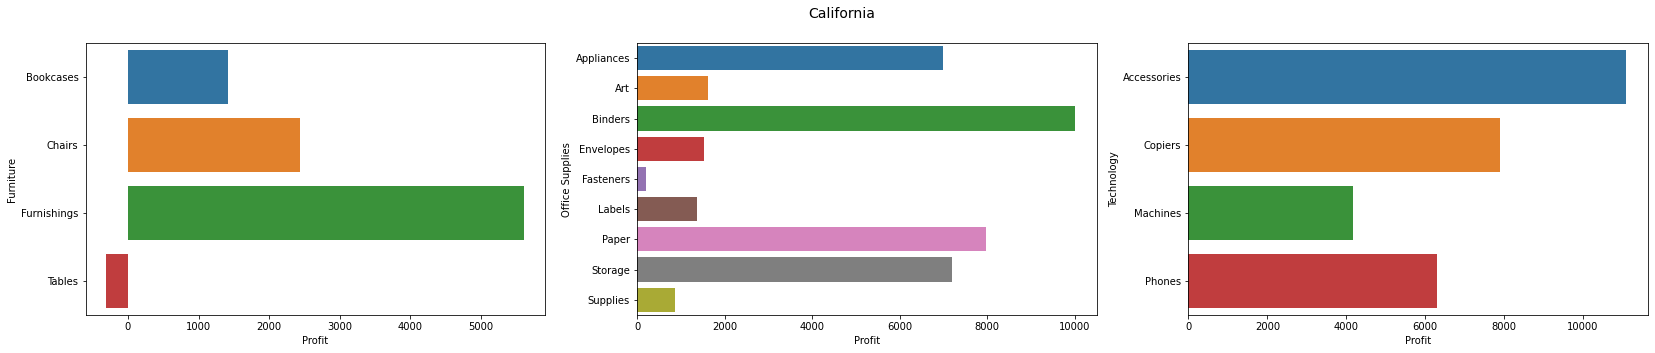

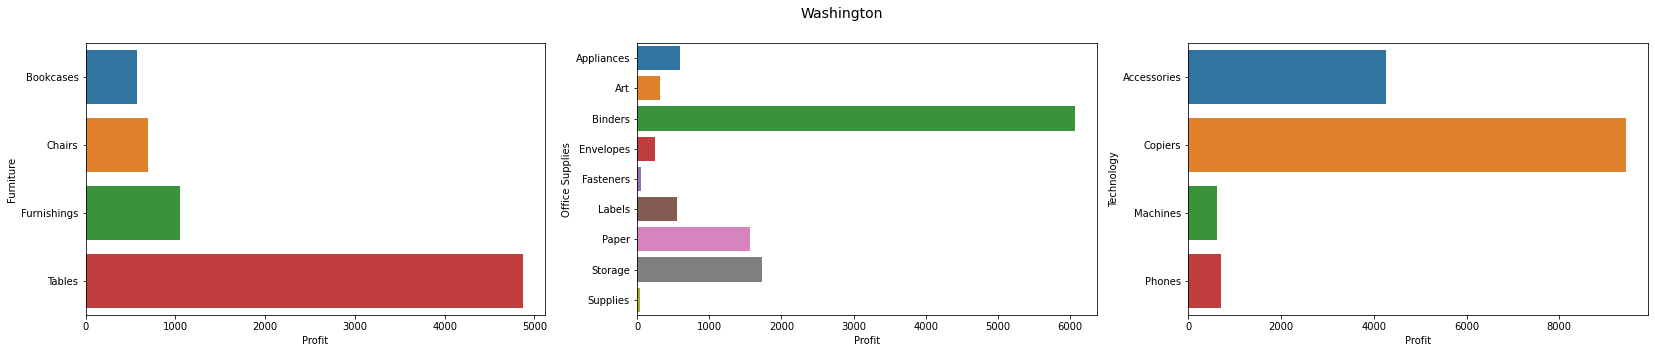

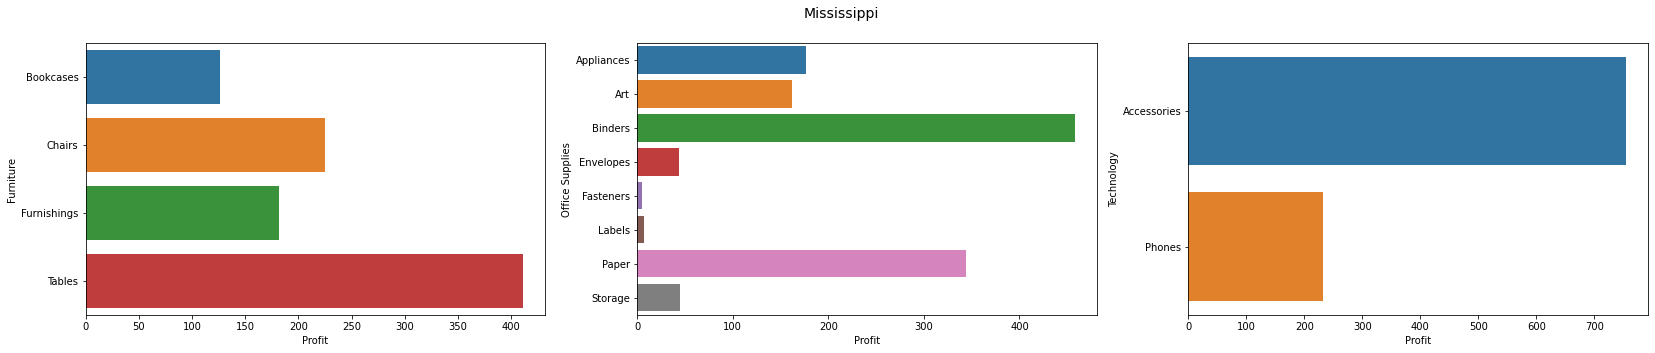

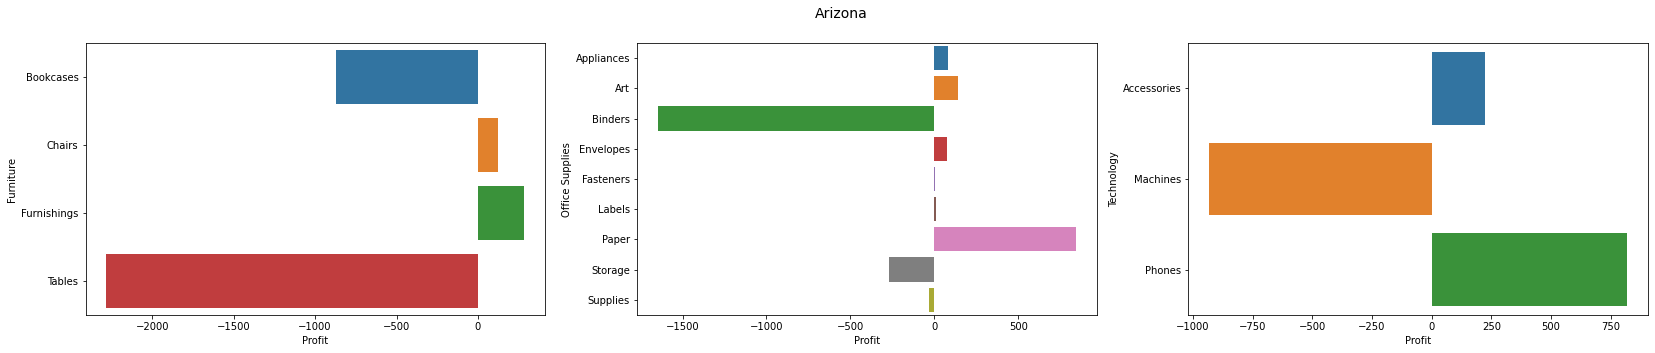

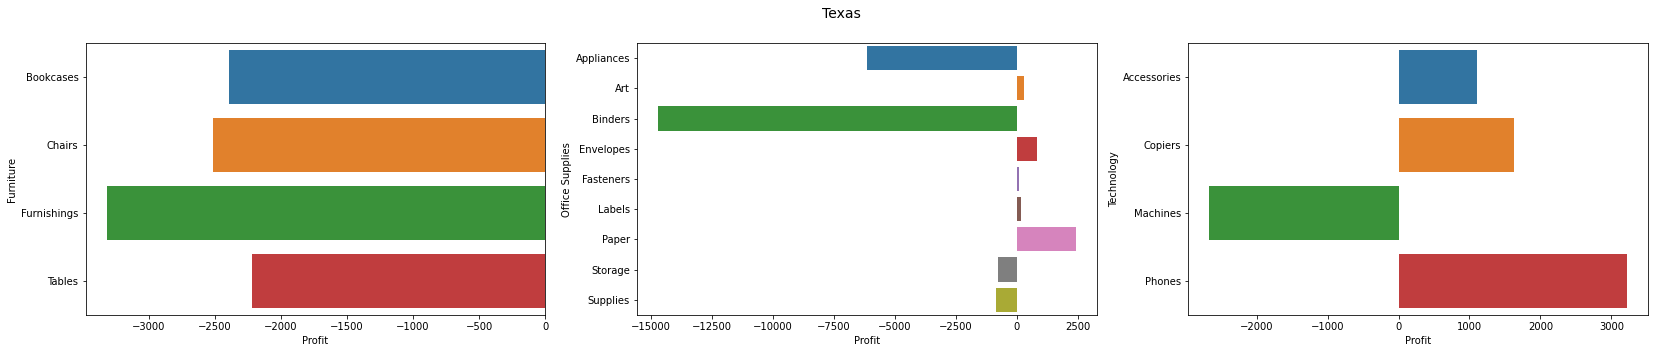

In [ ]:

states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Texas']
state_data_viewer(states)

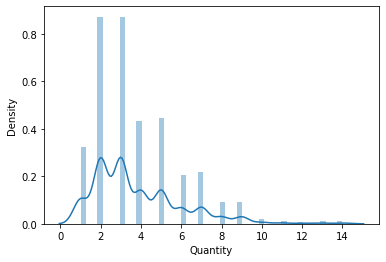

In [ ]:
sns.distplot(sample1['Quantity'])
plt.show()

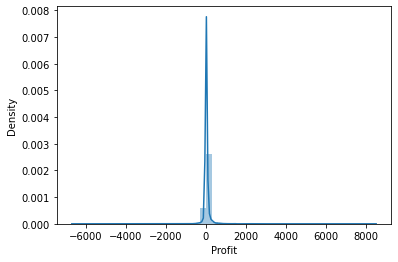

In [ ]:
sns.distplot(sample1['Profit'])
plt.show()

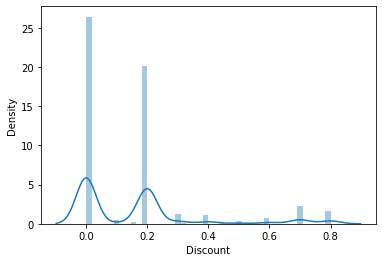

In [ ]:
sns.distplot(sample1['Discount'])
plt.show()

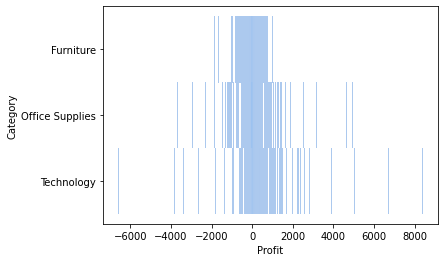

In [ ]:
sns.histplot(x='Profit', y='Category', data=sample1)
plt.show()

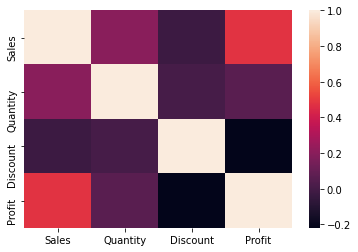

In [ ]:
tc = sample1.corr()
sns.heatmap(tc)
plt.show()

**PROFIT V/S DISCOUNT RELATION**

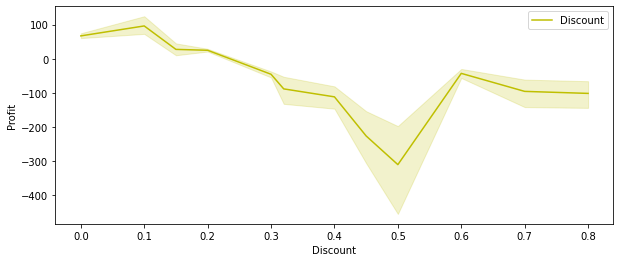

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot('Discount','Profit', data=sample1 , color='y',label='Discount')
plt.legend()
plt.show()

**PROFIT ON EACH SUB-CATEGORY PRODUCT**

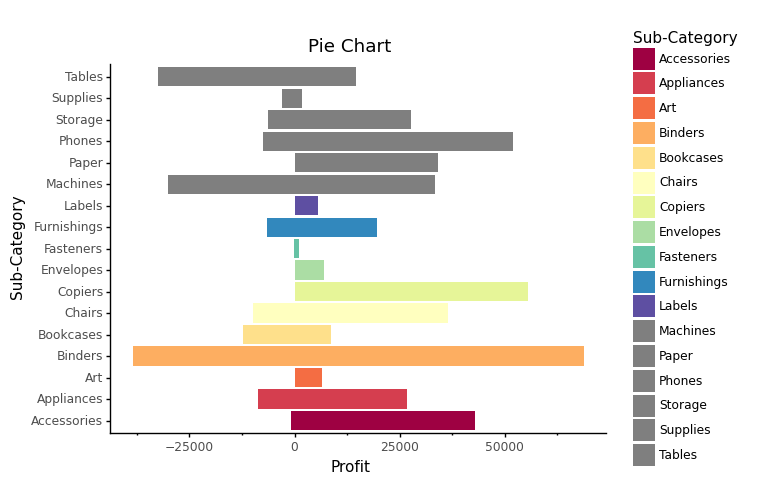

<ggplot: (8736729338197)>

In [ ]:
Profit_plot = (ggplot(sample, aes(x='Sub-Category', y='Profit', fill='Sub-Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Pie Chart'))

display(Profit_plot)

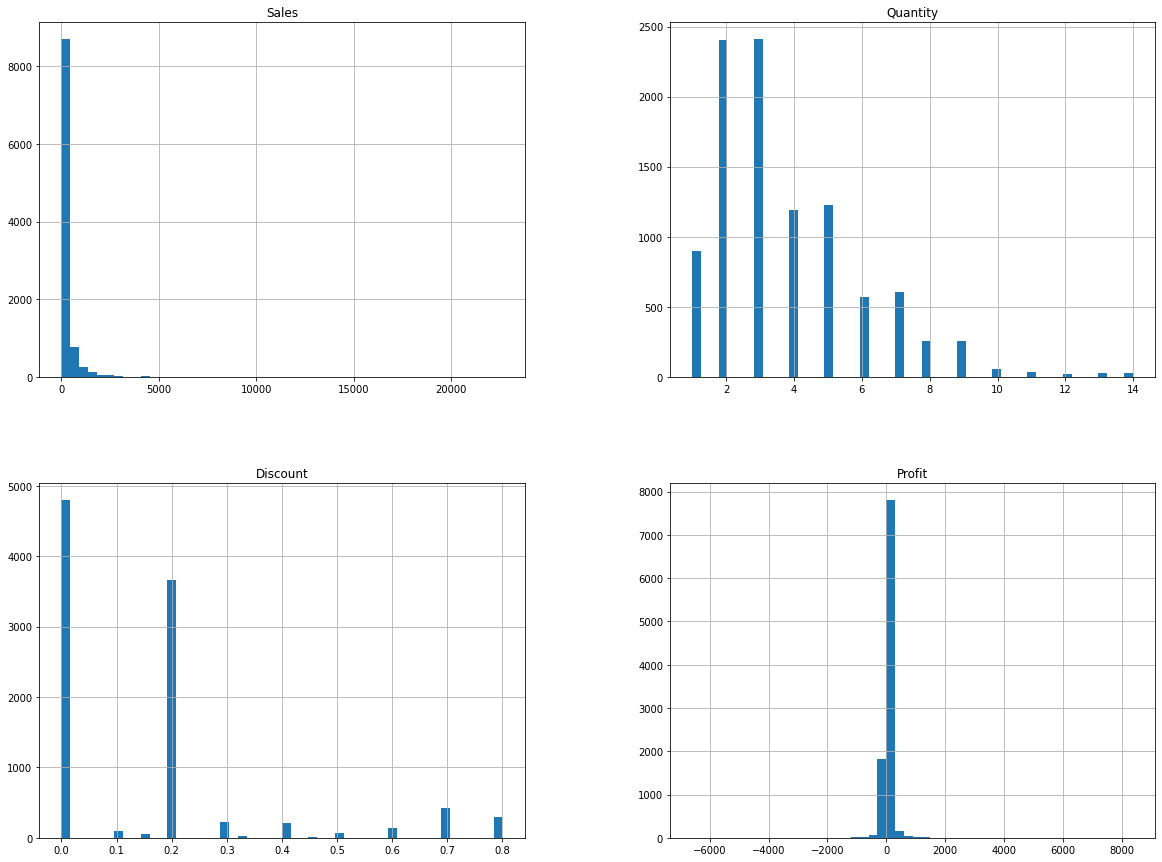

In [ ]:
sample1.hist(bins=50,figsize=(20,15))
plt.show();

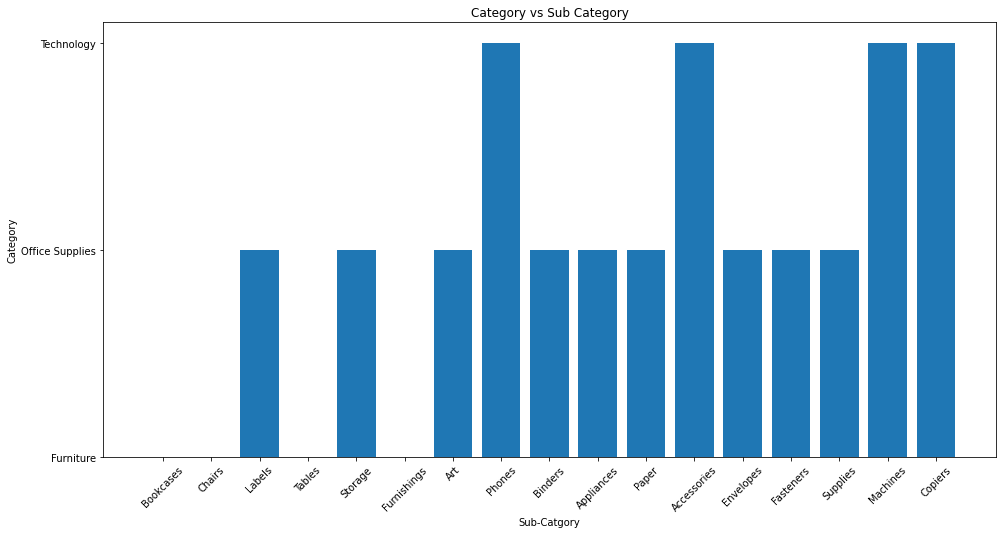

In [ ]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=sample1)
plt.title('Category vs Sub Category')
plt.xlabel('Sub-Catgory')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Count the total repeatable states
sample1['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

**STATE V/S COUNT PLOT**

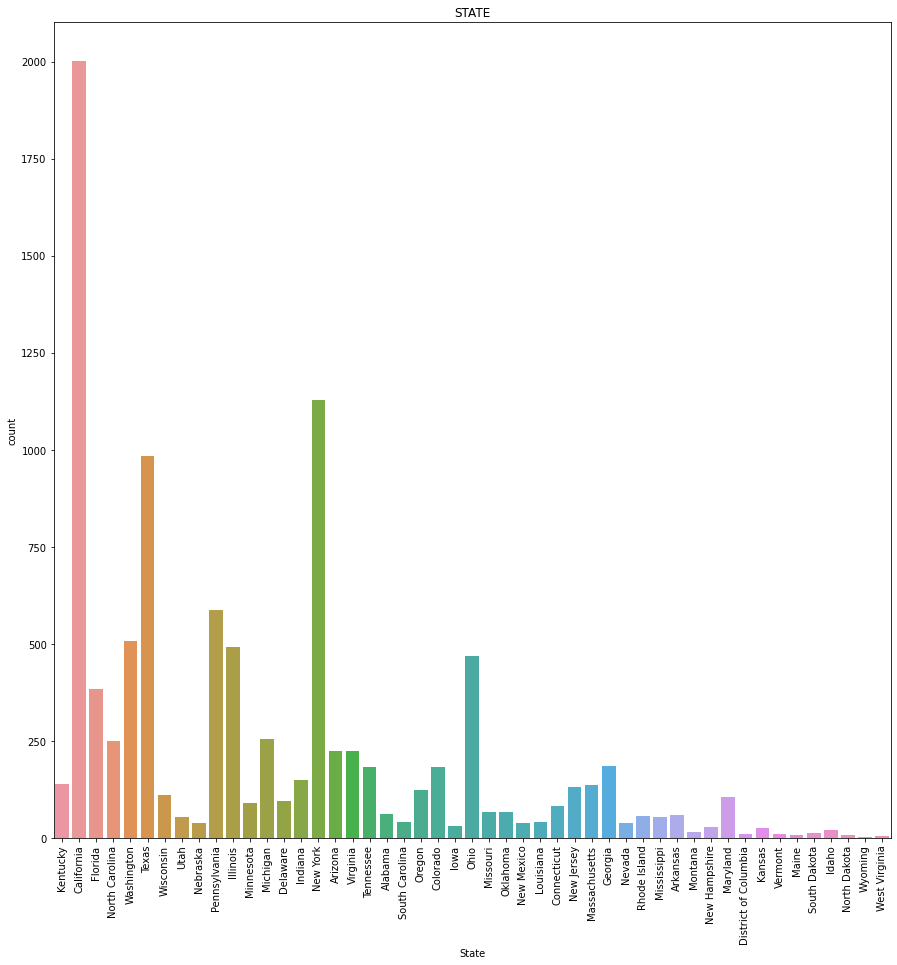

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(x=sample1['State'])
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

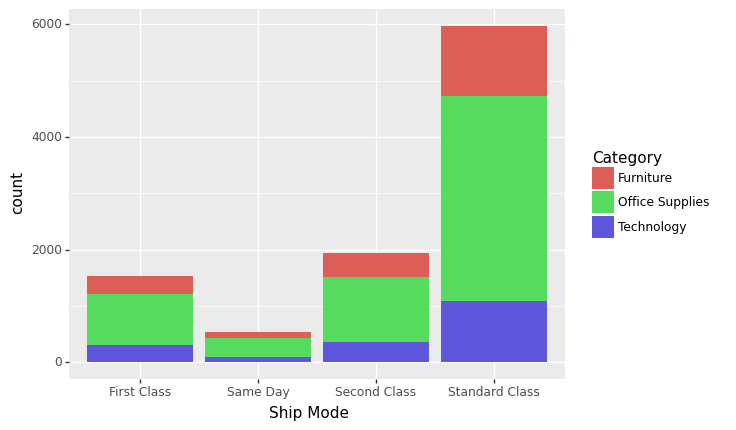

<ggplot: (8736722954001)>

In [ ]:
# SHIPING MODE OF EACH CATEGORY PRODUCT
ggplot(sample, aes(x='Ship Mode', fill = 'Category')) + geom_bar(stat = 'count')

<function matplotlib.pyplot.show>

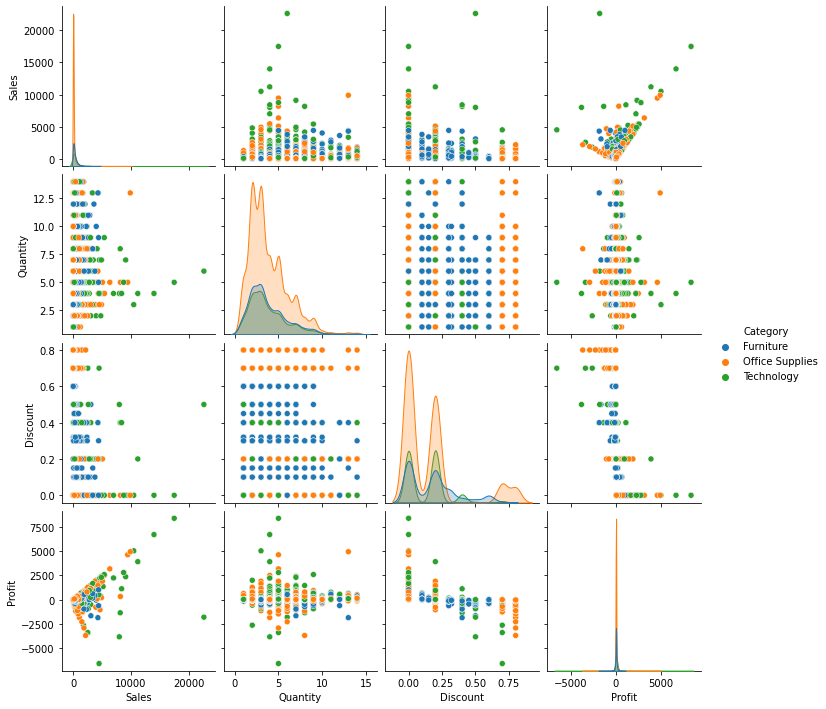

In [ ]:
# PAIRPLOT OF CATEGORY OF PRODUCTS
figsize=(15,10)
sns.pairplot(sample1,hue='Category')
plt.show

<function matplotlib.pyplot.show>

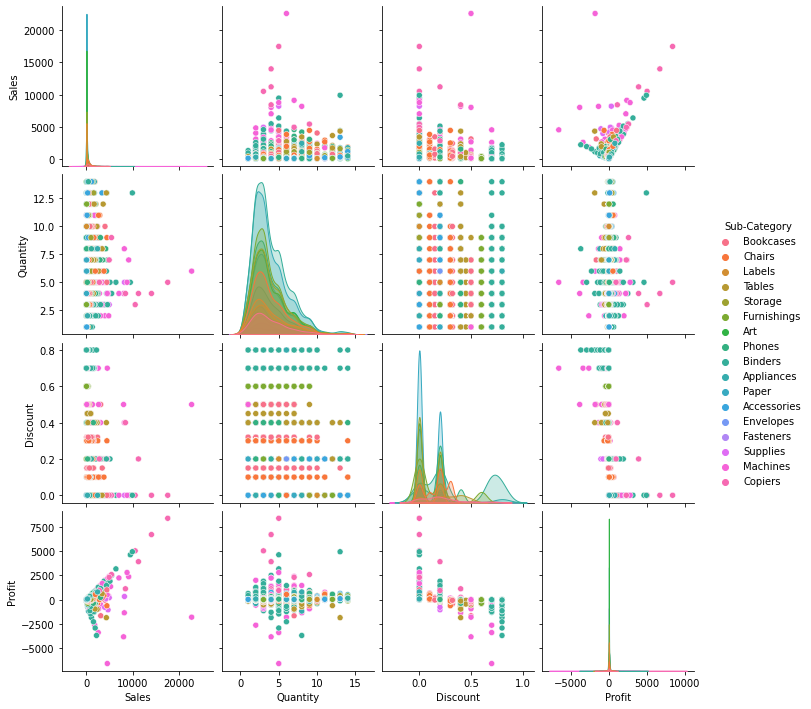

In [ ]:
#PAIRPLOT OF SUB-CATEGORY OF PRODUCT
figsize=(15,10)
sns.pairplot(sample1,hue='Sub-Category')
plt.show

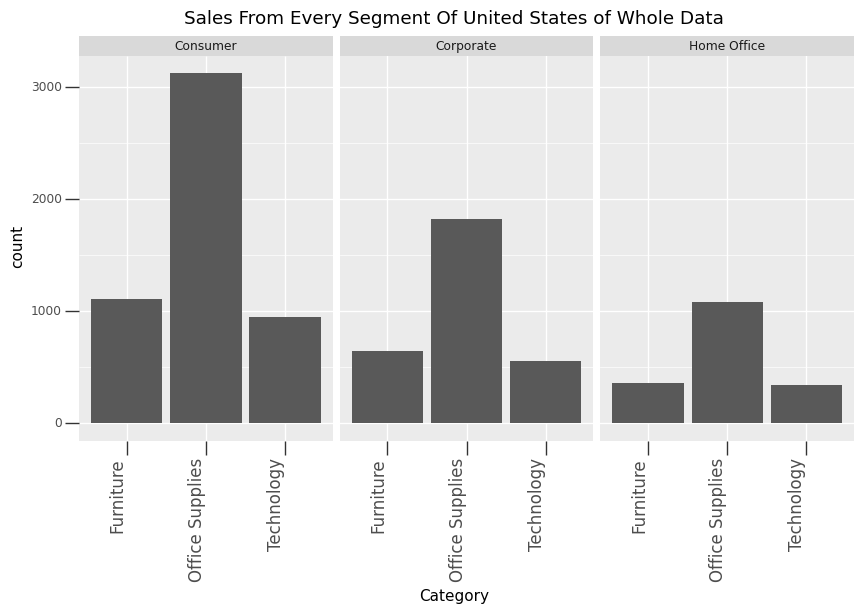

<ggplot: (8736729481069)>

In [ ]:
#Sales From Every Segment Of United States of Whole Data
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(sample, aes(x='Category', fill='Sales')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Sales From Every Segment Of United States of Whole Data"))

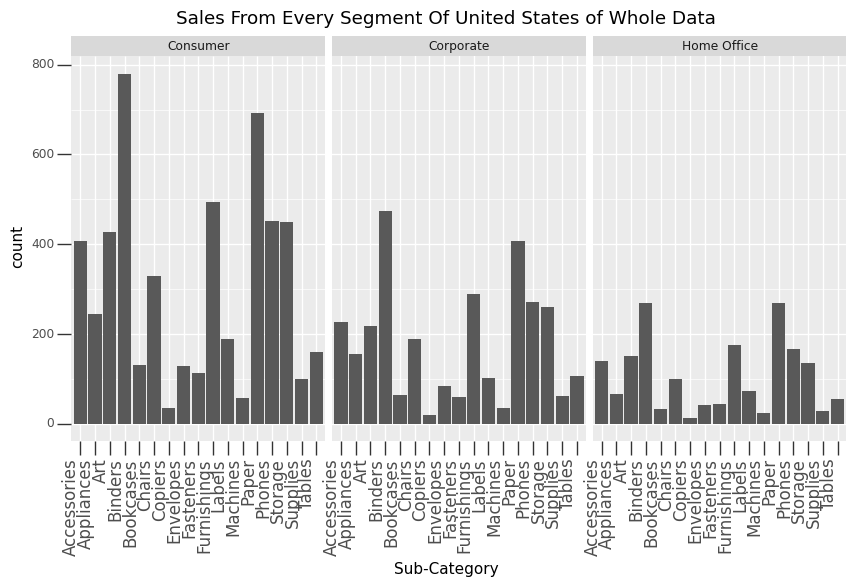

<ggplot: (8736724600573)>

In [ ]:
#Sales From Every Segment Of United States of Whole Data in sub-category

flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(sample, aes(x='Sub-Category', fill='Sales')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Sales From Every Segment Of United States of Whole Data"))

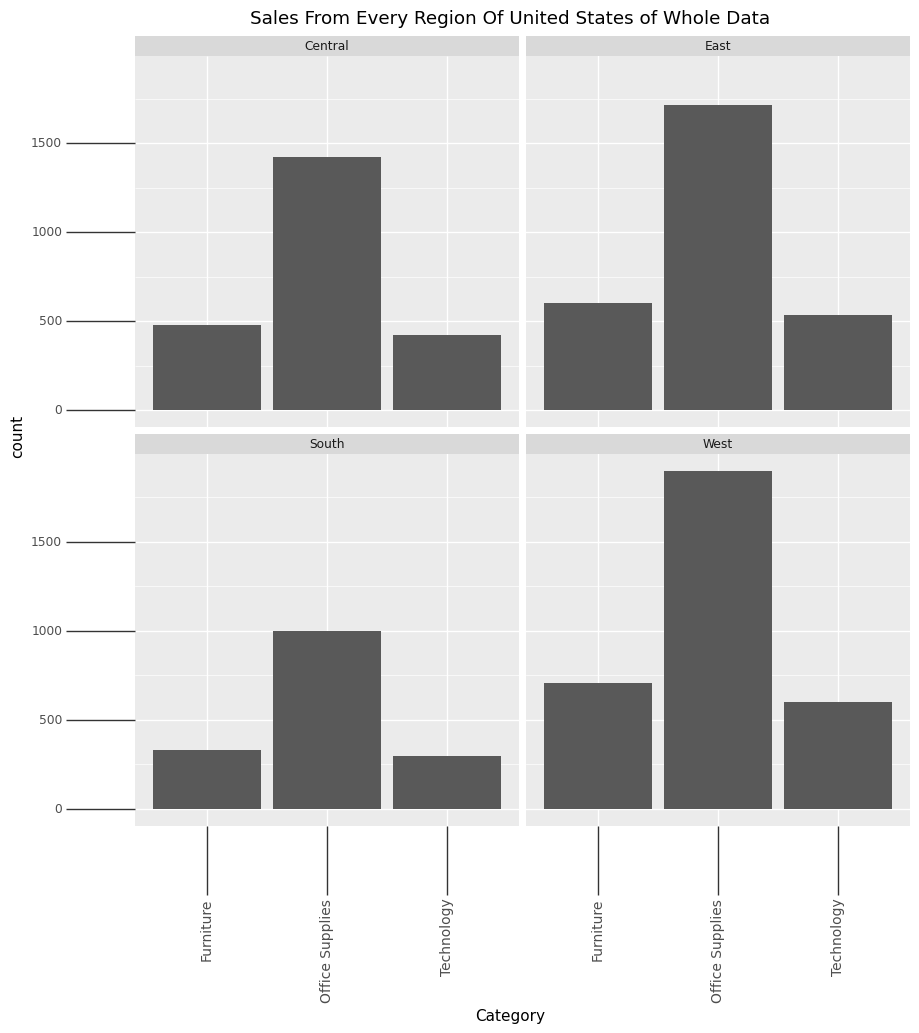

<ggplot: (8736732712613)>

In [ ]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),
                     axis_ticks_length_major=50,axis_ticks_length_minor=50)
(ggplot(sample1, aes(x='Category', fill='Sales')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['Region']) + flip_xlabels+ ggtitle("Sales From Every Region Of United States of Whole Data"))

### RESULT/CONCLUSION:

above data visualization,we can see the states and the category where sales and profits are high or less. We can improve in those states by providing discounts in prefered range so that the company and cosumer will both be in profit